In [ ]:
import networkx as nx
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Step 1: Load the edges (relationships) from the deezer_edges.csv file
edges_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_edges.csv'
edges_df = pd.read_csv(edges_file)
edges_df.head()



,node_1,node_2
0,0,14270
1,0,16976
2,0,12029
3,0,3001
4,0,14581


In [ ]:
import matplotlib.pyplot as plt
# Function to visualize the graph
def visualize_graph(G, title="Graph Visualization", max_nodes=100):

    plt.figure(figsize=(10, 10))
    subgraph = G if G.number_of_nodes() <= max_nodes else G.subgraph(list(G.nodes)[:max_nodes])
    pos = nx.spring_layout(subgraph)  # Layout for visualization
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()

In [ ]:
G = nx.Graph()

G.add_edges_from(edges_df.values)


In [ ]:
target_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_target.csv'
target_df = pd.read_csv(target_file)
target_df.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [ ]:
import json
features_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_features.json'

with open(features_file) as f:
    node_features = json.load(f)

In [ ]:
# Ensure that the nodes in the graph have features (optional, if features are necessary for community detection)
for node, features in node_features.items():
    if G.has_node(int(node)):
        G.nodes[int(node)]['features'] = features

In [ ]:
for _, row in target_df.iterrows():
    node_id = row['id']
    gender_label = row['target']  # Assuming 0 = Male, 1 = Female (or vice versa)
    if G.has_node(node_id):
        G.nodes[node_id]['label'] = gender_label


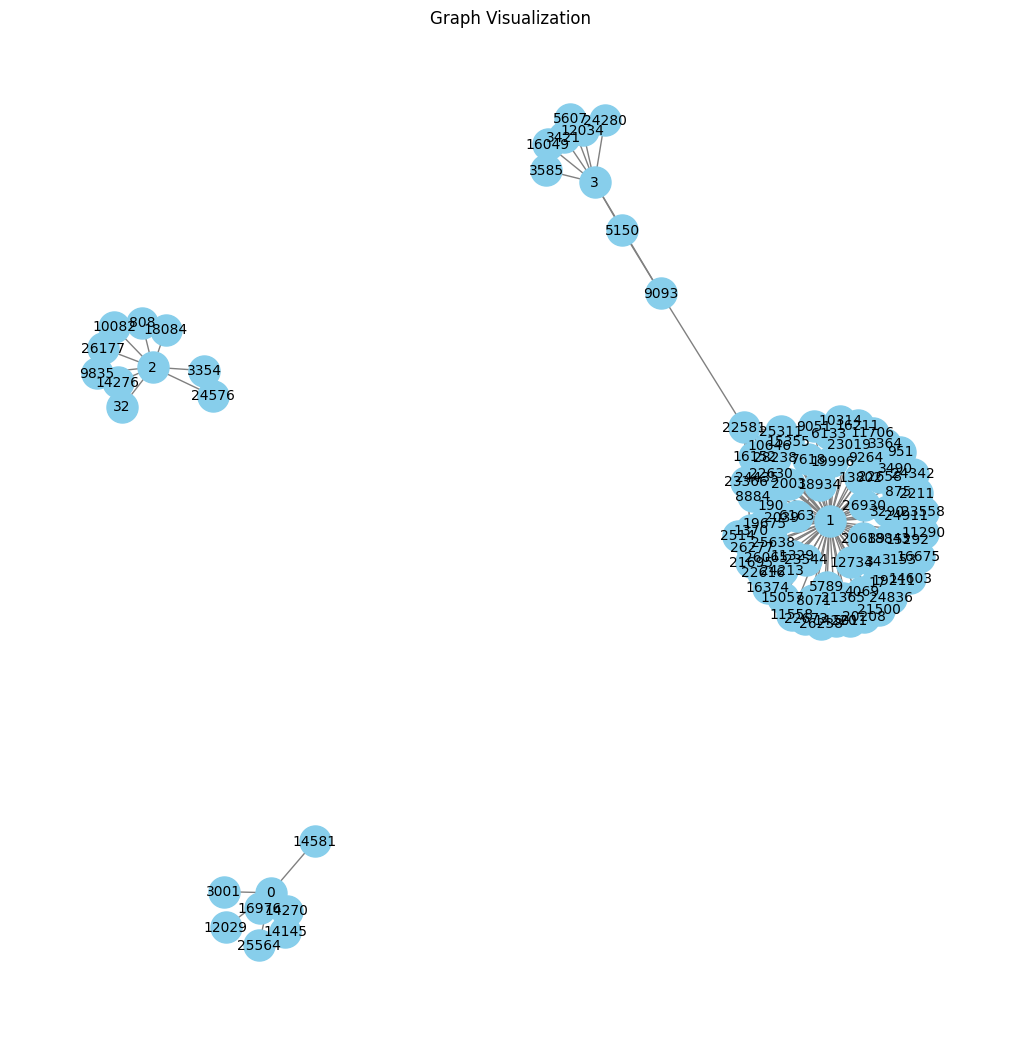

In [ ]:
visualize_graph(G)

In [ ]:
!pip install python-louvain

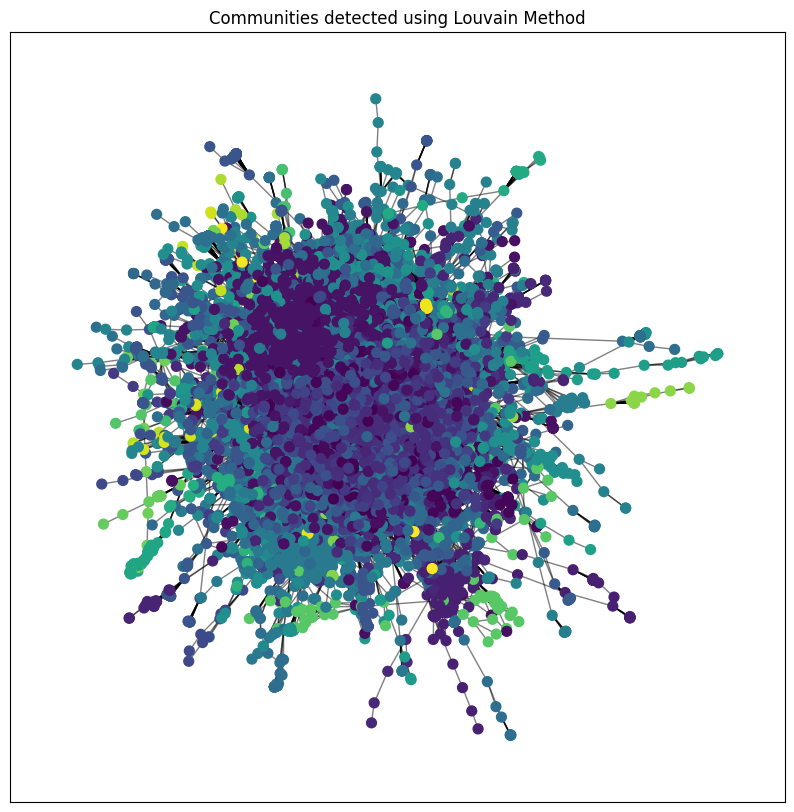

In [ ]:

import community.community_louvain as community_louvain

partition = community_louvain.best_partition(G)

pos = nx.spring_layout(G)  # Use spring layout for visualization
plt.figure(figsize=(10, 10))

# Coloring nodes based on the community they belong to
cmap = plt.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=50, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Communities detected using Louvain Method")
plt.show()



In [ ]:
# Step 3: Calculate modularity score (optional)
modularity = community_louvain.modularity(partition, G)
print(f'Modularity Score: {modularity}')


Modularity Score: 0.673948530266357


In [ ]:
# Partition is a dictionary where keys are node IDs and values are community labels
from collections import defaultdict

# Step 1: Group nodes by their community
communities = defaultdict(list)
for node, community in partition.items():
    communities[community].append(node)

# Step 2: Print each community and its members
for community, nodes in communities.items():
    print(f"Community {community}: {nodes}")


Community 0: [0, 14270, 16976, 12029, 14145, 25564, 10619, 1379, 22656, 20664, 27, 6282, 38, 6079, 12436, 7162, 2093, 17048, 68, 17027, 6500, 12060, 16309, 3570, 11897, 8472, 10956, 21315, 245, 124, 3852, 132, 21586, 25597, 17104, 12681, 9819, 18995, 6038, 5045, 24061, 12597, 21138, 164, 24645, 14794, 196, 7915, 16619, 13442, 12543, 3678, 206, 22135, 21450, 7523, 25272, 23760, 13699, 11073, 7487, 2274, 2592, 8720, 13472, 22889, 8923, 9881, 5546, 27108, 17641, 273, 359, 27508, 515, 6480, 5158, 17457, 23736, 287, 13947, 14555, 19995, 14158, 17848, 323, 7015, 3592, 9605, 2919, 7998, 22842, 17615, 568, 11626, 9239, 14533, 2157, 378, 16013, 9106, 3576, 2246, 12640, 5503, 10015, 19383, 13892, 16369, 1039, 28158, 22693, 449, 3638, 451, 10533, 4834, 458, 8715, 5112, 22255, 4817, 16656, 2189, 9403, 529, 16323, 17427, 17744, 5263, 3895, 15729, 22766, 19940, 2980, 16421, 17905, 13367, 5123, 587, 14480, 1401, 610, 14139, 17552, 23805, 20245, 617, 8106, 15152, 27218, 18911, 7330, 754, 22543, 10284,

In [ ]:

  for community, nodes in communities.items():
      gender_counts = {'male': 0, 'female': 0}  # Or adjust based on your label representation
      for node in nodes:
          if G.nodes[node].get('label') == 0:
              gender_counts['male'] += 1
          elif G.nodes[node].get('label') == 1:
              gender_counts['female'] += 1

      print(f"Community {community}: Male: {gender_counts['male']}, Female: {gender_counts['female']}")


Community 0: Male: 495, Female: 374
Community 1: Male: 780, Female: 573
Community 2: Male: 304, Female: 244
Community 3: Male: 173, Female: 88
Community 4: Male: 2552, Female: 1757
Community 37: Male: 138, Female: 122
Community 40: Male: 203, Female: 181
Community 7: Male: 136, Female: 138
Community 8: Male: 102, Female: 64
Community 9: Male: 68, Female: 79
Community 10: Male: 2429, Female: 1901
Community 11: Male: 408, Female: 342
Community 12: Male: 647, Female: 626
Community 13: Male: 431, Female: 379
Community 14: Male: 196, Female: 135
Community 15: Male: 621, Female: 482
Community 16: Male: 225, Female: 233
Community 17: Male: 367, Female: 432
Community 18: Male: 570, Female: 498
Community 19: Male: 463, Female: 459
Community 20: Male: 367, Female: 335
Community 21: Male: 572, Female: 293
Community 22: Male: 578, Female: 497
Community 23: Male: 126, Female: 85
Community 24: Male: 241, Female: 223
Community 25: Male: 127, Female: 129
Community 26: Male: 179, Female: 169
Community 

In [ ]:
for community, nodes in communities.items():
    feature_counts = defaultdict(int)
    for node in nodes:
        if 'features' in G.nodes[node]:
            # Assuming G.nodes[node]['features'] is a list of features:
            for feature in G.nodes[node]['features']:
                feature_counts[feature] += 1  # Increment count for each feature

    print(f"Community {community}: Feature Distribution: {dict(feature_counts)}")

Community 0: Feature Distribution: {81: 45, 213: 16, 574: 36, 577: 7, 697: 41, 766: 4, 1051: 3, 1074: 19, 1252: 33, 1309: 12, 1339: 4, 1673: 1, 1768: 32, 1897: 15, 1899: 5, 2122: 25, 2204: 13, 2207: 2, 2611: 2, 2771: 4, 2898: 25, 2899: 21, 2937: 5, 3040: 6, 3164: 21, 3495: 8, 3498: 1, 3517: 1, 4349: 1, 4385: 14, 4390: 3, 4611: 2, 4684: 8, 5286: 1, 5869: 1, 6534: 6, 6733: 1, 6857: 2, 6859: 2, 7155: 2, 8006: 10, 9192: 5, 9428: 1, 10174: 2, 10175: 1, 10231: 1, 10818: 1, 12163: 2, 13705: 5, 13710: 9, 15441: 2, 15548: 1, 17236: 1, 17574: 3, 18166: 1, 18383: 1, 18743: 1, 20341: 1, 20812: 1, 20864: 6, 20925: 2, 20927: 1, 21622: 1, 28879: 3, 218: 38, 7347: 42, 14384: 2, 8113: 37, 16455: 5, 18791: 3, 21475: 12, 22005: 7, 27432: 6, 29612: 3, 0: 62, 4: 1, 5: 18, 94: 36, 173: 6, 195: 2, 224: 1, 388: 35, 391: 10, 411: 2, 592: 3, 597: 7, 601: 3, 603: 2, 846: 3, 942: 17, 971: 2, 993: 2, 1046: 39, 1133: 1, 1302: 2, 1318: 9, 1351: 3, 1421: 1, 1462: 6, 1493: 1, 1713: 57, 1742: 1, 1752: 2, 1776: 2, 1803:

In [ ]:

  for community, nodes in communities.items():
      subgraph = G.subgraph(nodes)
      print(f"Community {community}: Size: {len(nodes)}, Density: {nx.density(subgraph)}")

Community 0: Size: 869, Density: 0.00474086958366256
Community 1: Size: 1353, Density: 0.0033587425707500753
Community 2: Size: 548, Density: 0.009320914343666182
Community 3: Size: 261, Density: 0.010521662245800176
Community 4: Size: 4309, Density: 0.0014157063243286222
Community 37: Size: 260, Density: 0.01087021087021087
Community 40: Size: 384, Density: 0.007982484769364665
Community 7: Size: 274, Density: 0.014224218603780647
Community 8: Size: 166, Density: 0.01913106973347937
Community 9: Size: 147, Density: 0.0212468549063461
Community 10: Size: 4330, Density: 0.0016094260897956047
Community 11: Size: 750, Density: 0.007138406764574989
Community 12: Size: 1273, Density: 0.003747400040512433
Community 13: Size: 810, Density: 0.005676875887011858
Community 14: Size: 331, Density: 0.016295889407671887
Community 15: Size: 1103, Density: 0.0059530763319967156
Community 16: Size: 458, Density: 0.010166932624960583
Community 17: Size: 799, Density: 0.0053920784439195615
Community 18:

In [ ]:

max_size = 0
max_density = 0
best_community = None

for community, nodes in communities.items():
    subgraph = G.subgraph(nodes)
    size = len(nodes)
    density = nx.density(subgraph)

    if size > max_size and density > max_density:
        max_size = size
        max_density = density
        best_community = community

if best_community is not None:
    print(f"Community with highest size and density: Community {best_community}, Size: {max_size}, Density: {max_density}")
else:
    print("No communities found.")

Community with highest size and density: Community 15, Size: 1103, Density: 0.0059530763319967156


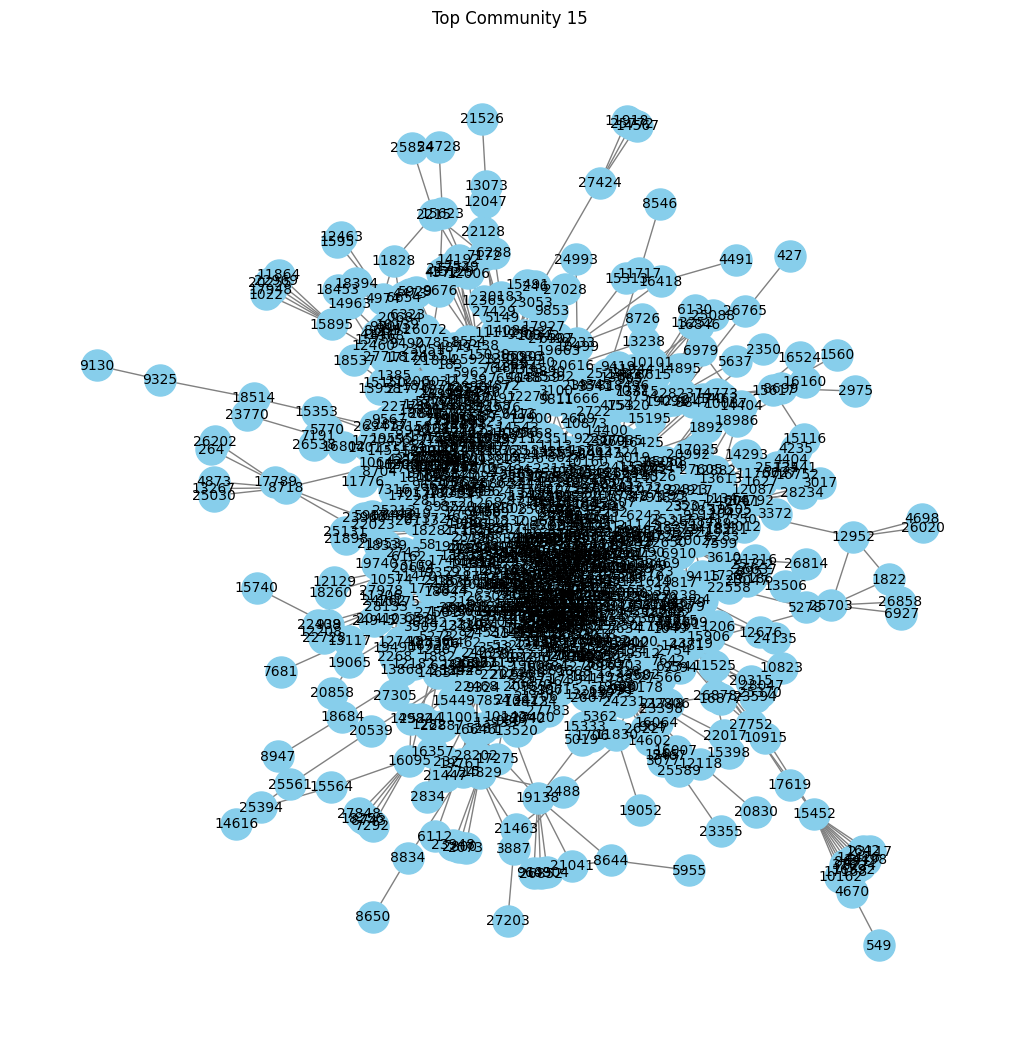

In [ ]:

if best_community is not None:
    # Get the nodes in the best community
    best_community_nodes = communities[best_community]

    # Create a subgraph for the best community
    best_community_subgraph = G.subgraph(best_community_nodes)

    # Plot the subgraph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(best_community_subgraph)
    nx.draw(best_community_subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(f"Top Community {best_community}")
    plt.show()